### Logistic RegressionÏùÑ ÏúÑÌïú Gradient Descent(Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï)

## Î™©Ìëú
In this lab, you will:
- logistic regressionÏùÑ ÏúÑÌïú Gradient Descent Í∞±Ïã†
- ÏπúÏàôÌïú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï Ï†ÅÏö©ÌïòÎäî Í≤ÉÏùÑ ÌÉêÍµ¨

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('deeplearning.mplstyle')

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

Ïù¥Ï†ÑÏóêÏÑú Ï≤òÏùå Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∑∏Î¶ºÏùÑ Í∑∏Î¶∞Îã§. 
label  ùë¶=1Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Îπ®Í∞ÑÏÉâÏúºÎ°ú xÎ•º Ï†ÅÏö©ÌïòÍ≥† ùë¶=0 Ïù∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÌååÎûÄÏÉâ ÏõêÏùÑ Ï†ÅÏö©Ìï®.

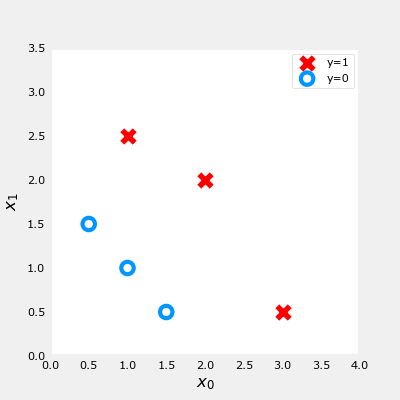

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Logistic Gradient Descent
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

ÎØ∏Î∂Ñ Í≥ÑÏÇ∞ÏùÑ ÌôúÏö©ÌïòÎäî Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï ÏïåÍ≥†Î¶¨Ï¶ò ÏÉÅÍ∏∞
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

$w_j$ Î™®Îì† $j$ Ïóê ÎåÄÌï¥ÏÑú ÎèôÏãúÏóê Í∞±Ïã†ÏùÑ ÏàòÌñâÌï®. Ïó¨Í∏∞ÏóêÏÑú
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m ÏùÄ Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏóêÏÑúÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò
* $f_{\mathbf{w},b}(x^{(i)})$ ÏùÄ Î™®Îç∏(linear regression)ÏóêÏÑú Ï∂úÎ†•Îêú ÏòàÏ∏°Í∞í, $y^{(i)}$ ÏùÄ Ï†ïÎãµ(label, target)
* Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑú $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    Ïù¥Í≤®ÏÑú $g(z)$ Îäî ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò:  
    $g(z) = \frac{1}{1+e^{-z}}$

### Gradient Descent Íµ¨ÌòÑ
Í≤ΩÏÇ¨ ÌïòÍ∞ï ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑÏùÄ 2Í∞úÏùò ÏöîÏÜåÎ°ú Íµ¨ÏÑ± : 
- ÏàòÏãù (1)Ïùò Î∞òÎ≥µÎ¨∏ Íµ¨ÌòÑ . Ïù¥Í≤ÉÏùÄ `gradient_descent` Ïù¥Í≥† Ïã§Î¨¥ÏóêÏÑúÎäî ÏÑ†ÌÉùÏÇ¨Ìï≠.
- ÌòÑÏû¨Ïùò Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ÏùÄ , ÏúÑÏùò ÏàòÏãù (2,3) . `compute_gradient_logistic` ÏïÑÎûòÏóêÏÑú Íµ¨ÌòÑ. 

#### Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞, ÏΩîÎìú ÏÑ§Î™Ö
Î™®Îì† $w_j$ ÏôÄ $b$Ïóê ÎåÄÌïòÏó¨ ÏúÑÏùò ÏàòÏãù (2),(3)ÏùÑ Íµ¨ÌòÑ .
Ïù¥Í≤ÉÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏßÄÎßå, ÏïÑÎûòÎäî Í∞úÍ¥ÑÏ†ÅÏù∏ ÏÑ§Î™Ö: 
- `dj_dw` ÏôÄ `dj_db` Î•º ÎàÑÏ†ÅÌïòÍ∏∞ ÏúÑÌï¥ Î≥ÄÏàòÎ•º Ï¥àÍ∏∞Ìôî.
- Í∞ÅÍ∞ÅÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïòÏó¨ 
    - Í∞ÅÍ∞ÅÏùò ÏóêÎü¨Ïóê ÎåÄÌïòÏó¨ $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - ÌïòÎÇòÏùò training Îç∞Ïù¥ÌÑ∞, Í∞ÅÍ∞ÅÏùò ÏûÖÎ†• Î≥ÄÏàò $x_{j}^{(i)}$ 
        - Ïò§Ï∞®(error)Î•º ÏûÖÎ†•($x_{j}^{(i)}$)Í≥º Í≥±ÌïòÍ≥† , `dj_dw`Ïùò Ìï¥Îãπ ÏÑ±Î∂ÑÏóê ÎçîÌïúÎã§ (ÏúÑÏùò ÏàòÏãù 2)
    - `dj_db` Î•º Ï∂îÍ∞ÄÎ°ú ÎçîÌï® (ÏúÑÏùò ÏàòÏãù 3)

- `dj_db` ÏôÄ `dj_dw` Î•º Ï¥ù Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàò (m) Î°ú ÎÇòÎàî.
- $\mathbf{x}^{(i)}$ Îäî numpy Îç∞Ïù¥ÌÑ∞ `X[i,:]` ÎòêÎäî `X[i]` ÏôÄ $x_{j}^{(i)}$ Îäî `X[i,j]`

In [4]:
def compute_gradient_logistic(X, y, w, b):
    """
        ÏÑ†Ìòï ÌöåÍ∑ÄÎ•º ÏúÑÌïú Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ 
        Args:
            X(ndarray(m, n)): nÍ∞úÏùò featureÎ•º Í∞ÄÏßÑ mÍ∞úÏùò training(ÌïôÏäµ) Îç∞Ïù¥ÌÑ∞
            y(ndarray(m, )): target(Ï†ïÎãµ)
            w(ndarray(n, )): Ïö∞Î¶¨Í∞Ä Ï∞æÍ≥†Ïûê ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞(weight, parameter)
            b(Ïä§ÏπºÎùº): Ïö∞Î¶¨Í∞Ä Ï∞æÍ≥†Ïûê ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞(bais, yÏ†àÌé∏)
        Return:
            dj_dw(ndarray(n, )) costÎ•º wÎ°ú ÎØ∏Î∂Ñ
            dj_db(Ïä§ÏπºÎùº) costÎ•º bÎ°ú ÎØ∏Î∂Ñ
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b) # (n,)(n,) = Ïä§ÏπºÎùº
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i,j] # Ïä§ÏπºÎùº
        dj_db += err_i
    dj_dw /= m  # (n,)
    dj_db /= m # Ïä§ÏπºÎùº
    return dj_db, dj_dw

In [8]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw:{dj_dw_tmp.tolist()}")

dj_db: 0.49861806546328574
dj_dw:[0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

#### Gradient Descent ÏΩîÎìú
ÏúÑÏùò Ïãù (1) Ïùò Íµ¨ÌòÑÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§. 
ÏúÑÏùò ÏàòÏãùÏóê Î£®Ìã¥ÏóêÏÑúÏùò Ìï®ÏàòÎ•º ÏúÑÏπòÏãúÌÇ§Í≥† ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Ïû†Ïãú Î©àÏ∂îÏûê. 

In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
        Batch(Ïó¨Îü¨Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥ÏÑú) Îã®ÏúÑÎ°ú Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï ÏàòÌñâ 
        Args:
            X(ndarray(m, n)): nÍ∞úÏùò featureÎ•º Í∞ÄÏßÑ mÍ∞úÏùò training(ÌïôÏäµ) Îç∞Ïù¥ÌÑ∞
            y(ndarray(m, )): target(Ï†ïÎãµ)
            w_in(ndarray(n, )): Ïö∞Î¶¨Í∞Ä Ï∞æÍ≥†Ïûê ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞(weight, parameter)
            b_in(Ïä§ÏπºÎùº): Ïö∞Î¶¨Í∞Ä Ï∞æÍ≥†Ïûê ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞(bais, yÏ†àÌé∏)
            alpha(float): ÌïôÏäµÎ•†(learing_rate)
            num_iters(Ïä§ÏπºÎùº): Í≤ΩÏÇ¨ ÌïòÍ∞ïÏùÑ ÎèôÏûëÏãúÌÇ§Í∏∞ ÏúÑÌïú Î∞òÎ≥µ ÌöüÏàò
        Return:
            w(ndarray(n, )) Í∞±Ïã†Îêú ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞í
            b(Ïä§ÏπºÎùº) Í∞±Ïã†Îêú ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞í
    """
    J_history = [] # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑÏóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú Cost(J)ÏôÄ weight(ÌååÎùºÎØ∏ÌÑ∞ wÏùò Î™®ÏûÑ)
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = computer_gradient_logistic(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i<100000:
            J_history.append(compute_cost_logistic(X, y, w, b))
        if i%math.ceil(num_iters/10) == 0:
                print(f"Î∞òÎ≥µ {i:4d}: cost{J_history[-1]}   ")
    return w, b, J_history

In [21]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000
w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters)
print(f"\n Í∞±Ïã†Îêú ÌååÎùºÎØ∏ÌÑ∞: w{w_out}, b{b_out}")

Î∞òÎ≥µ    0: cost0.684610468560574   
Î∞òÎ≥µ 1000: cost0.1590977666870457   
Î∞òÎ≥µ 2000: cost0.08460064176930078   
Î∞òÎ≥µ 3000: cost0.05705327279402531   
Î∞òÎ≥µ 4000: cost0.04290759421682   
Î∞òÎ≥µ 5000: cost0.03433847729884557   
Î∞òÎ≥µ 6000: cost0.02860379802212006   
Î∞òÎ≥µ 7000: cost0.02450156960879306   
Î∞òÎ≥µ 8000: cost0.02142370332569295   
Î∞òÎ≥µ 9000: cost0.019030137124109114   

 Í∞±Ïã†Îêú ÌååÎùºÎØ∏ÌÑ∞: w[5.28 5.08], b-14.222409982019837


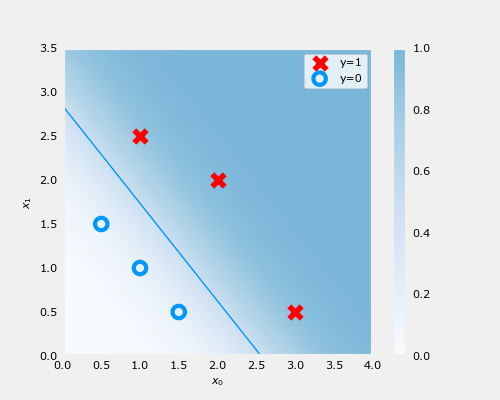

In [20]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
plt_prob(ax, w_out, b_out)

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train, y_train, ax)
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0], [x1,0], c=dlc['dlblue'], lw=1)
plt.show()